# Import packages

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Data

In [2]:
data = pd.read_csv("Admission_Predict.csv")

# EDA

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.shape

(400, 9)

### Checking variables types

In [6]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Distribution plot for each variables

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


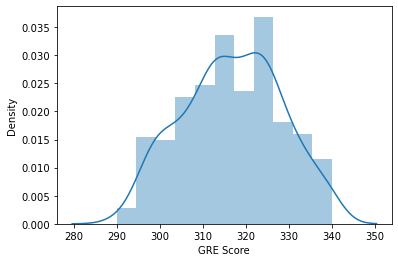

In [7]:
sns.distplot(data["GRE Score"])

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


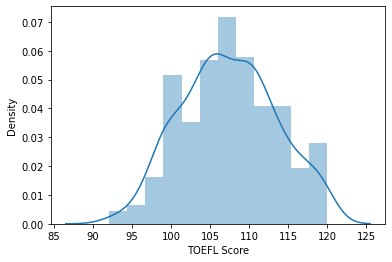

In [8]:
sns.distplot(data["TOEFL Score"])

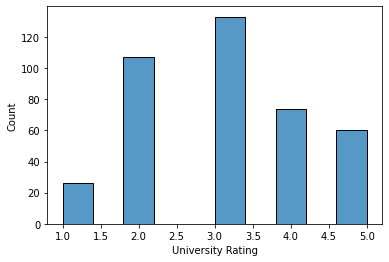

In [9]:
sns.histplot(data["University Rating"])

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


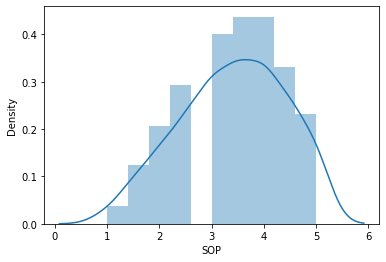

In [10]:
sns.distplot(data["SOP"])

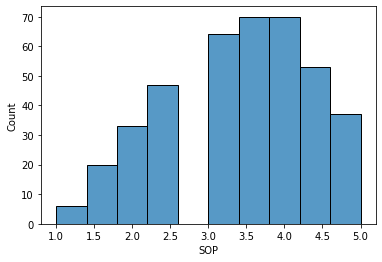

In [11]:
sns.histplot(data["SOP"])

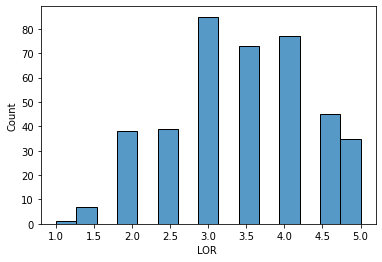

In [12]:
sns.histplot(data["LOR "])

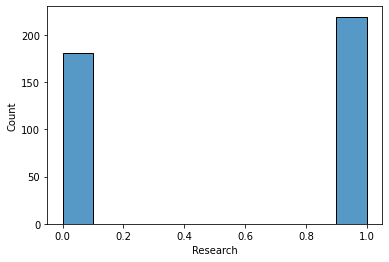

In [13]:
sns.histplot(data["Research"])

### Percentage of missing value

In [14]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
# missing_value_df.to_csv("missing_value.csv")

In [15]:
data["GRE Score"].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

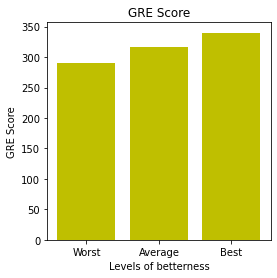

In [16]:
y = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
x = ["Worst","Average","Best"]
plt.figure(figsize = (4,4))
plt.bar(x,y,color = 'y')
plt.title("GRE Score")
plt.xlabel("Levels of betterness")
plt.ylabel("GRE Score")
plt.show()

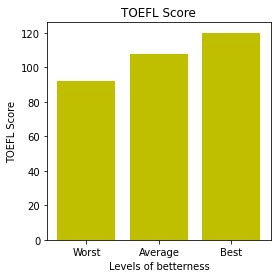

In [17]:
y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.figure(figsize = (4,4))
plt.bar(x,y,color = 'y')
plt.title("TOEFL Score")
plt.xlabel("Levels of betterness")
plt.ylabel("TOEFL Score")
plt.show()

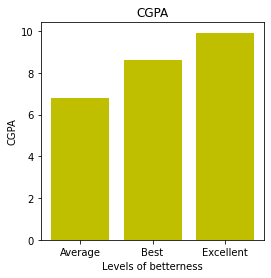

In [18]:
y = np.array([data["CGPA"].min(),data["CGPA"].mean(),data["CGPA"].max()])
x = ["Average","Best","Excellent"]
plt.figure(figsize = (4,4))
plt.bar(x,y,color = 'y')
plt.title("CGPA")
plt.xlabel("Levels of betterness")
plt.ylabel("CGPA")
plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


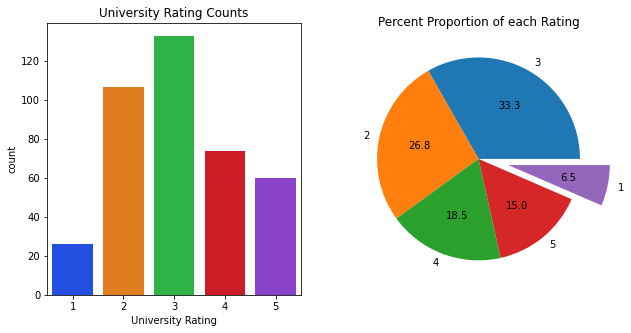

In [19]:
f, ax  = plt.subplots(1,2,figsize = (10,5))

sns.countplot(data['University Rating'],ax = ax[0],palette = 'bright')
ax[0].set_title('University Rating Counts')

ax[1].pie(data['University Rating'].value_counts(),
          labels = data['University Rating'].value_counts().index,autopct = '%1.1f',
         explode = [0,0,0,0,0.3])
ax[1].set_title('Percent Proportion of each Rating')            
plt.show()

### Checking for outliers

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

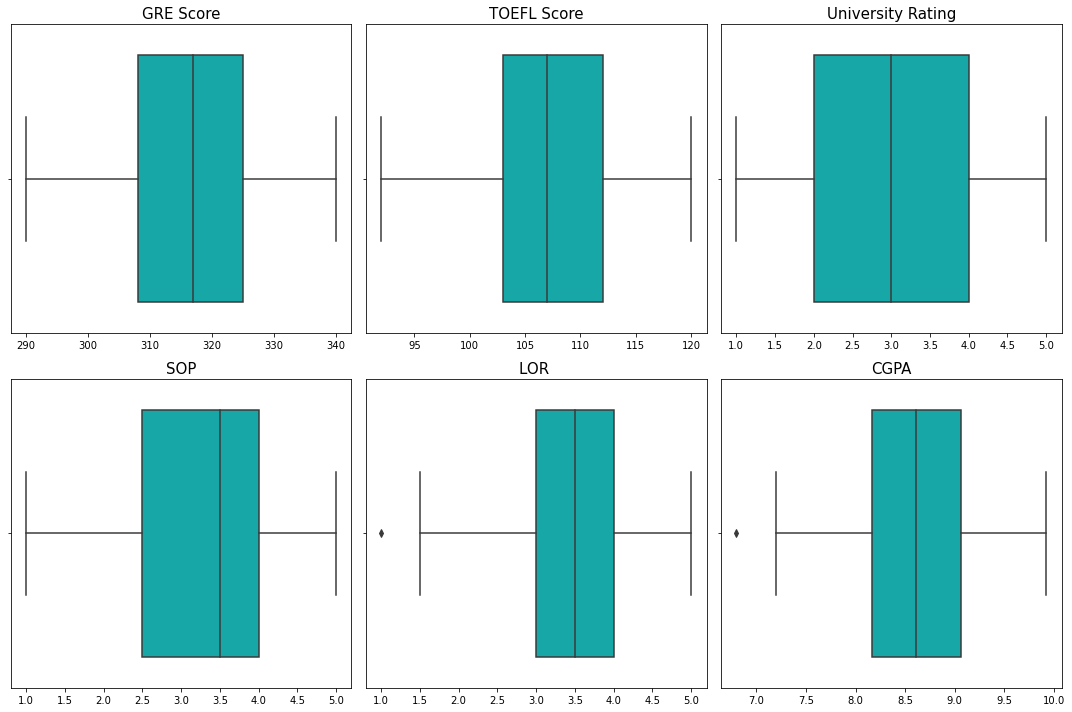

In [20]:
num_cols = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA']
fig, ax  = plt.subplots(2,3,figsize = (10,5))
count = 0
for i in range(2):
    for j in range(3):
        s = num_cols[count+j]
        sns.boxplot(data[s].values,ax = ax[i][j],color = 'c')
        ax[i][j].set_title(s,fontsize = 15)
        fig = plt.gcf()
        fig.set_size_inches(15,10)
        plt.tight_layout()
    count = count+j+1 

### Plotting regression plots

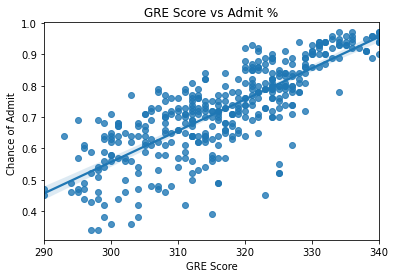

In [21]:
fig = sns.regplot(x="GRE Score", y="Chance of Admit ", data=data)
plt.title("GRE Score vs Admit %")
plt.show()

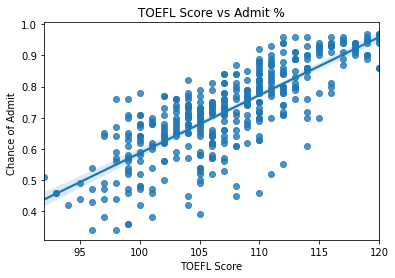

In [22]:
fig = sns.regplot(x="TOEFL Score", y="Chance of Admit ", data=data)
plt.title("TOEFL Score vs Admit %")
plt.show()

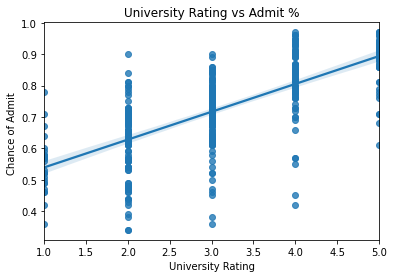

In [23]:
fig = sns.regplot(x="University Rating", y="Chance of Admit ", data=data)
plt.title("University Rating vs Admit %")
plt.show()

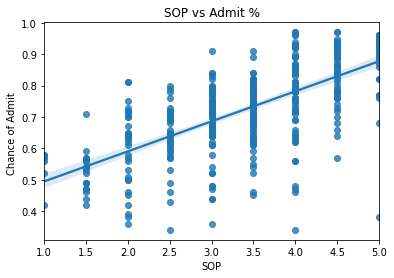

In [24]:
fig = sns.regplot(x="SOP", y="Chance of Admit ", data=data)
plt.title("SOP vs Admit %")
plt.show()

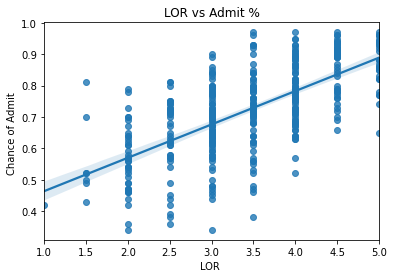

In [25]:
fig = sns.regplot(x="LOR ", y="Chance of Admit ", data=data)
plt.title("LOR vs Admit %")
plt.show()

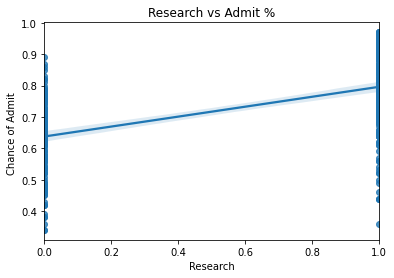

In [26]:
fig = sns.regplot(x="Research", y="Chance of Admit ", data=data)
plt.title("Research vs Admit %")
plt.show()

### Heatmap

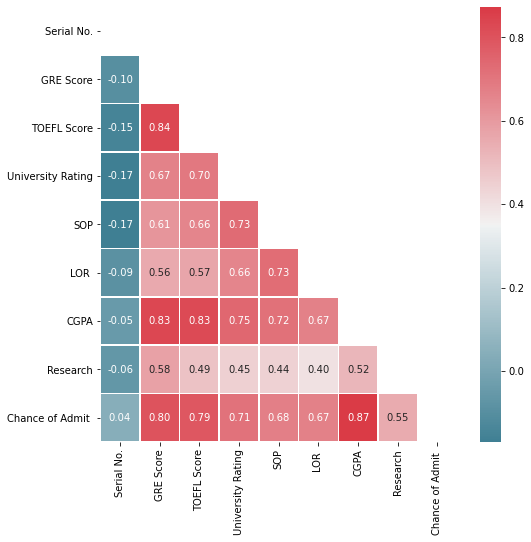

In [28]:
import numpy as np
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# Standardization

In [43]:
scaled_features = data.copy()
col_names = list(scaled_features.columns)
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)


# Train test split

In [53]:
from sklearn.model_selection import train_test_split
X = scaled_features.drop(['Chance of Admit ','Serial No.',"Research"], axis=1)
y = scaled_features['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [54]:
X_test.shape


(80, 6)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("LinearRegression", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of LinearRegression: ",r2_score(y_test,predictions))

LinearRegression 0.05892665935099229
R-score of LinearRegression:  0.8019814504115809
